# **Fraud Detection**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd 'drive/My Drive/Colab Notebooks/insaid'

/content/drive/My Drive/Colab Notebooks/insaid


### **Importing libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import plot_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Importing dataset**

In [4]:
data = pd.read_csv('Fraud.csv')

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.shape

(6362620, 11)

### **Preprocessing data**

**Checking for NaN values in dataset**

In [7]:
data.isnull().any().any()

False

*There are not any missing values in dataset.*

**Getting numerical and categorical columns**

In [8]:
num = []
cat = []
for col in data.columns:
  if(data[col].dtype == "object"):
    cat.append(col)
  else:
    num.append(col)

In [9]:
cat

['type', 'nameOrig', 'nameDest']

**Encoding categorical variable**

In [10]:
enc = LabelEncoder()
for i in cat:
  data[i] = enc.fit_transform(data[i])

In [11]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


**Checking for outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


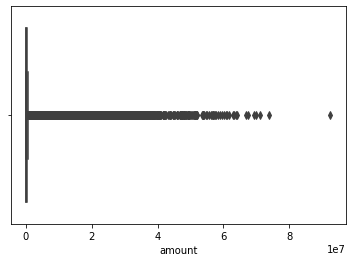

In [15]:
sns.boxplot(data['amount'])

In [19]:
upper_limit = data['amount'].quantile(0.99)
lower_limit = data['amount'].quantile(0.01)

In [20]:
data = data[(data['amount'] <= upper_limit) & (data['amount'] >= lower_limit)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


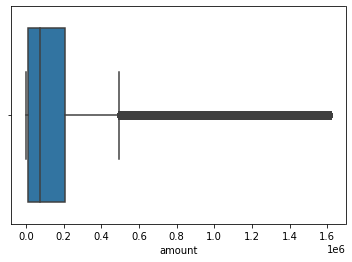

In [22]:
sns.boxplot(data['amount'])

**Checking for multilinear collinearity**

In [24]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [25]:
calc_vif(data)

,variables,VIF
0,step,2.863387
1,type,5.596850
2,amount,2.946951
3,nameOrig,2.870072
4,oldbalanceOrg,1430.911755
5,newbalanceOrig,1454.738574
6,nameDest,4.167506
7,oldbalanceDest,226.019337
8,newbalanceDest,232.997759
9,isFraud,1.034716


In [26]:
data = data.drop(['oldbalanceOrg','oldbalanceDest'], axis = 1)
data.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,160296.36,1662094,0.0,0,0
1,1,3,1864.28,2188998,19384.72,1733924,0.0,0,0
4,1,3,11668.14,3445981,29885.86,828919,0.0,0,0
5,1,3,7817.71,6026525,46042.29,2247218,0.0,0,0
6,1,3,7107.77,1805947,176087.23,2063363,0.0,0,0


In [27]:
calc_vif(data)

,variables,VIF
0,step,2.811835
1,type,4.654974
2,amount,1.869995
3,nameOrig,2.845845
4,newbalanceOrig,1.184981
5,nameDest,3.887688
6,newbalanceDest,1.201794
7,isFraud,1.005075
8,isFlaggedFraud,1.000650


In [28]:
data.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,160296.36,1662094,0.0,0,0
1,1,3,1864.28,2188998,19384.72,1733924,0.0,0,0
4,1,3,11668.14,3445981,29885.86,828919,0.0,0,0
5,1,3,7817.71,6026525,46042.29,2247218,0.0,0,0
6,1,3,7107.77,1805947,176087.23,2063363,0.0,0,0


In [29]:
data['isFlaggedFraud'].unique()

array([0, 1])

**Splitting data into dependent and independent variables**

In [30]:
X = data.iloc[:,0:8]

In [32]:
y = data.iloc[:,8]

**Feature Scaling**

In [34]:
sc = StandardScaler()

In [35]:
num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [36]:
num.remove("oldbalanceOrg")
num.remove("oldbalanceDest")
num.remove("isFlaggedFraud")
num

['step',
 'amount',
 'newbalanceOrig',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [38]:
X[num] = sc.fit_transform(X[num])
X.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud
0,-1.699714,3,-0.683264,757869,-0.240838,1662094,-0.357986,-0.031544
1,-1.699714,3,-0.724024,2188998,-0.288632,1733924,-0.357986,-0.031544
4,-1.699714,3,-0.673919,3445981,-0.285070,828919,-0.357986,-0.031544
5,-1.699714,3,-0.693597,6026525,-0.279590,2247218,-0.357986,-0.031544
6,-1.699714,3,-0.697226,1805947,-0.235482,2063363,-0.357986,-0.031544


## **Modeling**

**Creating train and test dataset**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### **Decision Tree**

In [42]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [45]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1247073,       0],
       [      0,       1]])

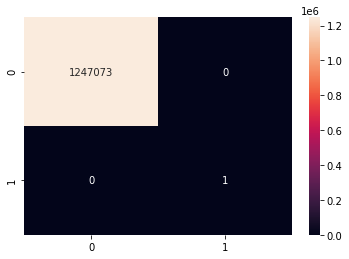

In [49]:
sns.heatmap(cm,annot=True,fmt="d")

In [50]:
acc = sum(cm.diagonal())/cm.sum()
acc*100

100.0

### **ANN**

In [54]:
from tensorflow import keras
from keras import backend as k
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

In [57]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', 
                     activation = 'relu', input_dim = 8))
classifier.add(Dense(units = 29, kernel_initializer = 'uniform', 
                     activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                     activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

In [64]:
model = classifier.fit(X_train, y_train, batch_size = 1000, epochs = 5)

Epoch 1/5
4989/4989 [==============================] - 17s 3ms/step - loss: 0.0324 - accuracy: 0.9999 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/5
4989/4989 [==============================] - 16s 3ms/step - loss: 0.0076 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 3/5
4989/4989 [==============================] - 16s 3ms/step - loss: 0.0199 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 4/5
4989/4989 [==============================] - 16s 3ms/step - loss: 0.0260 - accuracy: 0.9999 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 5/5
4989/4989 [==============================] - 17s 3ms/step - loss: 0.0190 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00


In [65]:
y_pred = classifier.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [66]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1247073,       0],
       [      1,       0]])

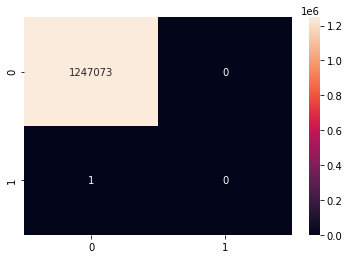

In [67]:
sns.heatmap(cm,annot=True,fmt="d")

In [68]:
acc = sum(cm.diagonal())/cm.sum()
acc*100

99.99991981229662

### **XGBoost**

In [86]:
# fit model no training data
model = XGBClassifier(learning_rate = 0.01, n_estimators=1000, max_depth=8, min_child_weight=1, gamma=0,
                             subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', seed=27,
                             tree_method='gpu_hist')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [87]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1247073,       0],
       [      1,       0]])

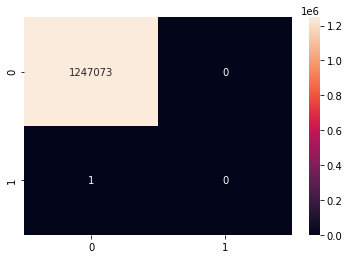

In [89]:
sns.heatmap(cm,annot=True,fmt="d")

In [90]:
acc = sum(cm.diagonal())/cm.sum()
acc*100

99.99991981229662

### **Key factors that predict fraudlent customers**

In [100]:
plt.rcParams["figure.figsize"] = (10,5)

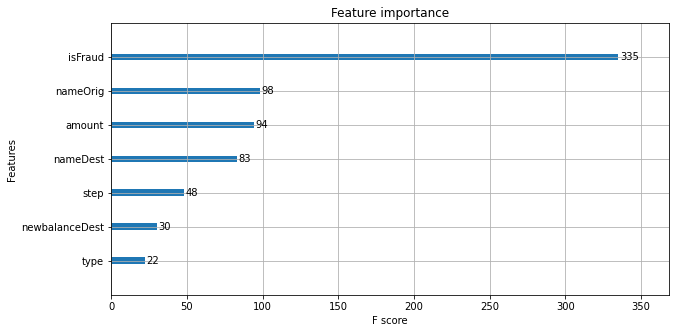

In [101]:
plot_importance(model)
plt.show()

**isFraud** is the most important feature in predicting fraudlent customers with the score of **335** followed by nameOrig with the score of 96 and amount with the score of 94. isFraud is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.